['2 1\n', '-30 20 20']
[2, 1]
entrada 0:


 1


entrada 1:


 1



Vista corta de los datos
   A  B  S
0  0  0  0
1  0  1  0
2  1  0  0
3  1  1  1
Datos= 
[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]
entrada= [1, 1]
salida= [[0.9999546]]
m = 400


C:\Users\adria\AppData\Local\Temp\ipykernel_12156\3423853991.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  salidas[0,a] = self.neuronas[a].sigmoide(X)
C:\Users\adria\AppData\Local\Temp\ipykernel_12156\3423853991.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  salidas[0,a] = self.neuronas[a].sigmoide(X)


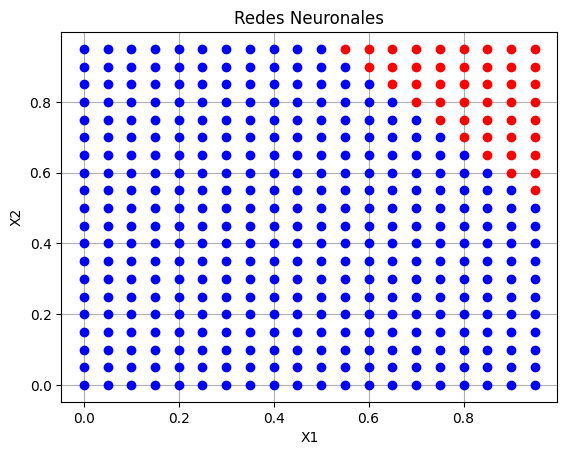

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class Neurona:
    def __init__(self, N):
        self.b = 1
        self.w = np.zeros([N,1])
        for a in range(N):
            self.w[a,0] = np.random.randn()*0.1        
    
    def sigmoide(self, X):
        return 1/(1 + np.exp(-(np.dot(X, self.w)+self.b)))
    
    def __str__(self):
        return f"b= {self.b}, \nw= \n{self.w}"
        

class Capa:
    def __init__(self, neuronas, entradas):
        self.neuronas = []        
        for a in range(neuronas):
            self.neuronas.append(Neurona(entradas))
    
    def forwardPropagation(self, X):
        salidas = np.zeros([1, len(self.neuronas)])
        for a in range(len(self.neuronas)):
            salidas[0,a] = self.neuronas[a].sigmoide(X)
        return salidas
    
    def backPropagation(self, error):
        a = 1
        
    def __str__(self):
        cadena = ""
        i = 1
        for a in self.neuronas:
            cadena += "Neurona " + str(i) + ":\n"
            cadena += str(a) + "\n"
            i = i + 1
        return cadena
    
class RedNeuronal:
    "ejemplo de llamada seria: RedNeuronal([4,2,1]), donde el 4 es el número de variables de entrada, el 2 es el número de neuronas de la primer capa, y 1 es l capa de salida"
    def __init__(self, capas):
        self.capas = []
        for a in range(len(capas)-1):
            self.capas.append(Capa(capas[a+1], capas[a]))
    
    def forwardPropagation(self, X):
        for a in range(len(self.capas)):
            X = self.capas[a].forwardPropagation(X)
            #print(f"x= {X}")
        return X
    
    def prediccion(self, X):
        m = X.shape[0]
        print(f"m = {m}")
        Y = np.zeros([m,1])
        for a in range(m):
            Y[a] = self.forwardPropagation(X[a,:])
        return Y
    
    def getCosto(self, X, Y):
        costo = 0
        m = len(Y)
        for a in range(m):
            yp = self.forwardPropagation(X[a,:])
            loss = -(Y[a] * np.log(yp) + (1-Y[a]) * np.log(1-yp))
            costo += loss
        costo /= m
        return costo
    
    def backPropagation(self, X, Y):
        error = self.getCosto(X,Y)
    
    def __str__(self):
        cadena = "Red Neuronal que tiene " + str(len(self.capas[0].neuronas[0].w)) + " entradas y " + str(len(self.capas)) +" capas\n"
        i = 1
        for a in self.capas:
            cadena += "Capa "+ str(i) + ":\n"
            cadena += str(a) + "\n"
            i = i + 1
        return cadena

with open('entrada.txt') as f:
    lines = f.readlines()
print(lines)
ARN = lines[0].split()
ARNF = [int(n) for n in ARN ]
print(ARNF)
datos=pd.read_csv('data/and.csv', sep=',')#,header=None)
entrada = []
for i in range(0,ARNF[0]):
    print(f"entrada {i}:")
    entrada.append(int(input()))
# and
# or
# nor
# xnor
print("\nVista corta de los datos")
print(datos.head())
datos = datos.to_numpy()
print(f"Datos= \n{datos}")
N = datos.shape[1] - 1
X = datos[:,0:N]
Y = datos[:,N]
A = RedNeuronal(ARNF)

#for i in range(1,len(ARNF)):
#    print(i)
####################################################################
#NOR
num_inputs = ARNF[0]  # Número de entradas
capa_index = 0
capaAct = ARNF[capa_index+1]
neurona_index=0
for line in lines[1:]:
    values = list(map(float, line.split()))
    neurona = A.capas[capa_index].neuronas[neurona_index]
    neurona.b = values[0]
    val_index = 0
    for val in values[1:]:
        neurona.w[val_index,0] = val
        val_index+=1
    ARNF[capa_index+1]-=1
    neurona_index+=1
    if ARNF[capa_index+1] == 0:
        capa_index+=1
        neurona_index=0
    
#######

B = A.forwardPropagation(entrada)
#B = A.getCosto(X,Y)
print(f"entrada= {entrada}")
print(f"salida= {B}")

datos=pd.read_csv('data/datosPrueba.csv', sep=',')#,header=None)
#datosPrueba
datos = datos.to_numpy()
N = datos.shape[1] - 1
m = datos.shape[0]
X = datos[:,0:N]
Yp = A.prediccion(X)
#print(f"prediccion= {Y}")

X0 = [j for j in range(m) if Yp[j]<0.5]
X1 = [j for j in range(m) if Yp[j]>=0.5]


plt.plot(X[X0,0],X[X0,1],"bo")
plt.plot(X[X1,0],X[X1,1],"ro")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Redes Neuronales")
plt.show()
